Q: Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [18]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [4]:
airlines = pd.read_excel('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/Airlines+Data.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
airlines['Month'].unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [8]:
from datetime import datetime,time
airlines['Date']=pd.to_datetime(airlines.Month,format='%b-%y')
airlines['Month'] = airlines.Date.dt.strftime('%b')
airlines['Year'] = airlines.Date.dt.strftime('%y')

In [9]:
airlines

,Month,Passengers,Date,Year
0,Jan,112,1995-01-01,95
1,Feb,118,1995-02-01,95
2,Mar,132,1995-03-01,95
3,Apr,129,1995-04-01,95
4,May,121,1995-05-01,95
...,...,...,...,...
91,Aug,405,2002-08-01,02
92,Sep,355,2002-09-01,02
93,Oct,306,2002-10-01,02
94,Nov,271,2002-11-01,02


In [10]:
airlines.isnull().sum()

Month         0
Passengers    0
Date          0
Year          0
dtype: int64

In [11]:
airlines.dtypes

Month                 object
Passengers             int64
Date          datetime64[ns]
Year                  object
dtype: object

In [12]:
airlines.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [13]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     object        
 1   Passengers  96 non-null     int64         
 2   Date        96 non-null     datetime64[ns]
 3   Year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


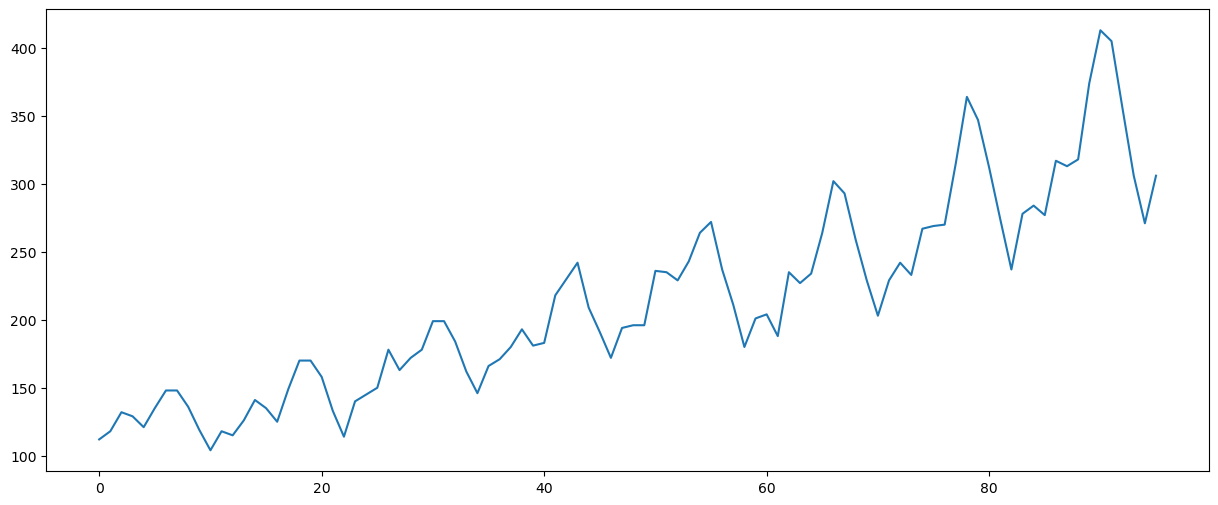

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
airlines['Passengers'].plot(figsize=(15,6))
plt.show()

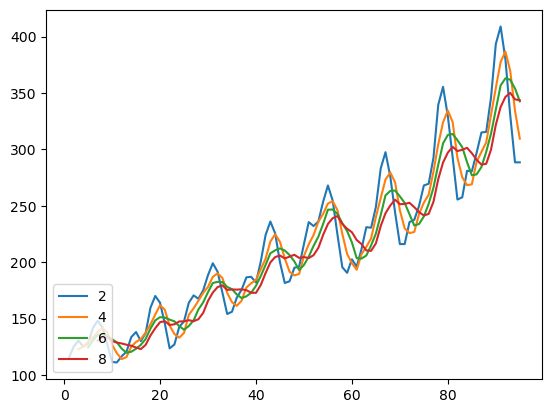

In [15]:
for i in range(2,10,2):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)    

<AxesSubplot:xlabel='Month', ylabel='Year'>

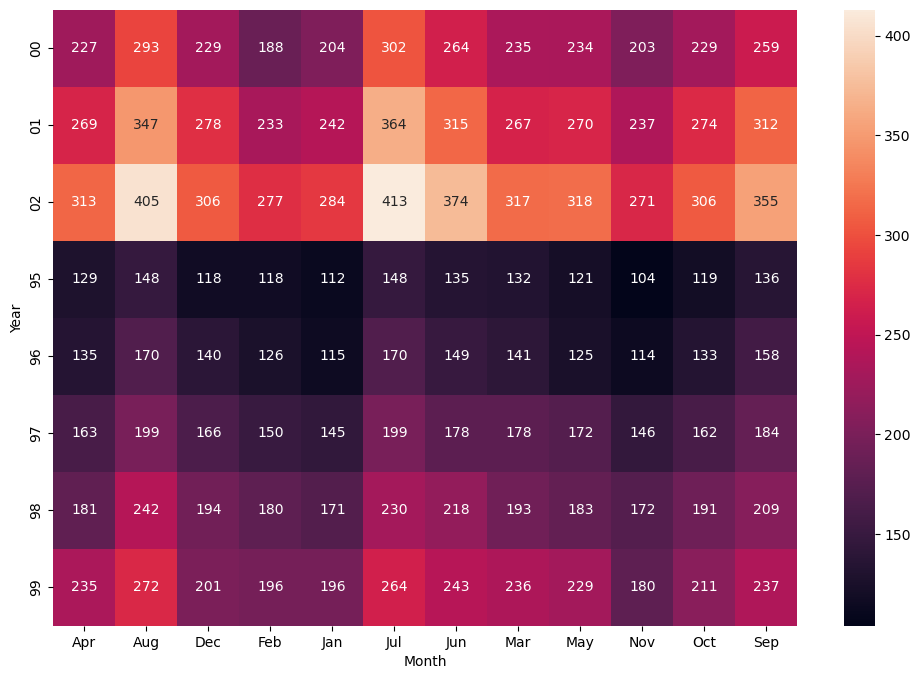

In [17]:
plt.figure(figsize=(12,8))
Heatmap_y_month = pd.pivot_table(data = airlines,values = 'Passengers',index = 'Year',columns = 'Month',aggfunc = 'mean',fill_value = 0)
sns.heatmap(Heatmap_y_month,annot=True,fmt = 'g')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

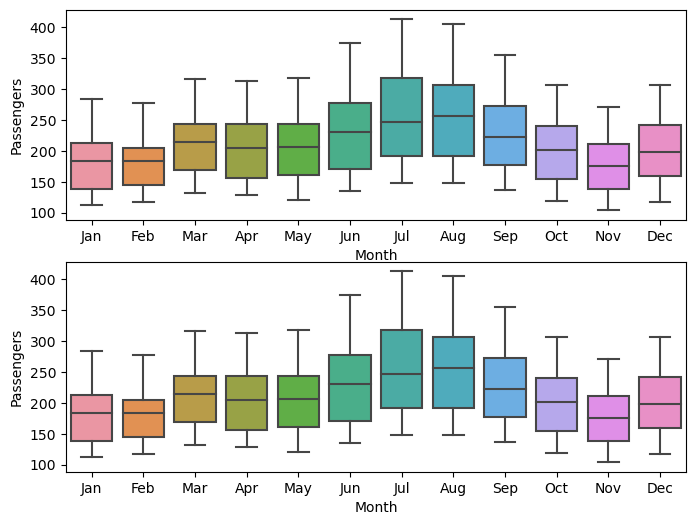

In [34]:
#BOXPLOT
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='Month',y = 'Passengers',data = airlines)
plt.subplot(212)
sns.boxplot(x='Month',y = 'Passengers',data = airlines)

•BUILDING TIME SERIES 

In [35]:
month_dummies = pd.DataFrame(pd.get_dummies(airlines['Month']))
airline = pd.concat([airlines,month_dummies],axis = 1)

In [36]:
airline['T'] = np.arange(1,97)
airline['T_Squared'] = airline['T'] * airline['T']
airline['Log_Passengers'] = np.log(airline['Passengers'])

In [37]:
airline

,Month,Passengers,Date,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,T,T_Squared,Log_Passengers
0,Jan,112,1995-01-01,95,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb,118,1995-02-01,95,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar,132,1995-03-01,95,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr,129,1995-04-01,95,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May,121,1995-05-01,95,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,405,2002-08-01,02,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep,355,2002-09-01,02,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct,306,2002-10-01,02,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov,271,2002-11-01,02,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='Year', ylabel='Passengers'>

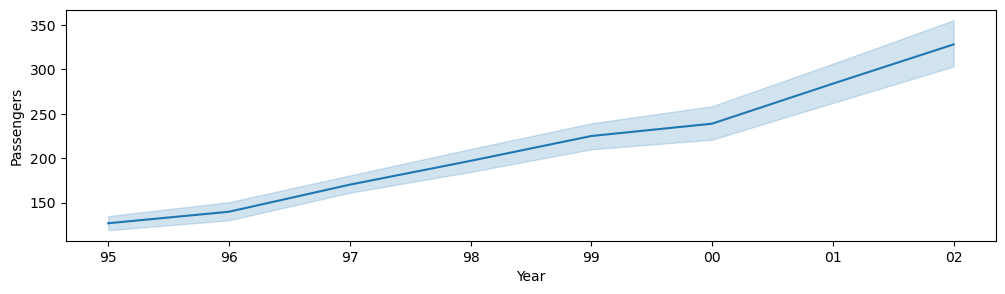

In [38]:
plt.figure(figsize=(12,3))
sns.lineplot(x='Year',y='Passengers',data = airlines)

In [39]:
train = airline.head(80)
test = airline.tail(16)

In [40]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers ~ T',data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['T'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.54262406772677

In [42]:
#EXPONENTIAL MODEL
exp_model = smf.ols('Log_Passengers ~ T',data = train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['T'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.exp(pred_exp))**2))
rmse_exp

43.79373939334308

In [46]:
#QUADRATIC MODEL
quad_model = smf.ols('Passengers ~ T + T_Squared',data = train).fit()
pred_quad = pd.Series(quad_model.predict(test[['T','T_Squared']]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

43.65440369584248

In [47]:
#ADDITIVE SEASONALITY
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])- np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443313

In [50]:
#ADDITIVE SEASONALITY QUADRATIC
add_sea_quad = smf.ols('Passengers~T+T_Squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','T','T_Squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.91098357010629

In [51]:
#MULTIPLICATIVE SEASONALITY
mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

135.32648414621084

In [55]:
#MULTIPLICATIVE ADDITIVE SEASONALITY
mul_add_sea = smf.ols('Log_Passengers~T+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

9.469000230305973

In [56]:
#Tabulating the rmse values
data= {'Model':pd.Series(['RMSE LINEAR','RMSE EXP','RMSE QUAD','RMSE ADD SEA','RMSE ADD SEA QUAD','RMSE MULT SEA','RMSE MUL ADD SEA']),'RMSE_Values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
6,RMSE MUL ADD SEA,9.469000
4,RMSE ADD SEA QUAD,23.910984
2,RMSE QUAD,43.654404
1,RMSE EXP,43.793739
0,RMSE LINEAR,47.542624
3,RMSE ADD SEA,129.266476
5,RMSE MULT SEA,135.326484


In [57]:
# Forecasting for next 12 months
data = [['2003-01-01','Jan'],['2003-02-01','Feb'],['2003-03-01','Mar'],['2003-04-01','Apr'],['2003-05-01','May'],['2003-06-01','Jun'],['2003-07-01','Jul'],['2003-08-01','Aug'],['2003-09-01','Sep'],['2003-10-01','Oct'],['2003-11-01','Nov'],['2003-12-01','Dec']]
# Print(data)
forecast = pd.DataFrame(data,columns = ['Date','Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-05-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [58]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast, dummies], axis =1)
print('After dummy\n',forecast1.head())

forecast1['T'] = np.arange(1,13)
forecast1['T_Squared'] = forecast1['T'] * forecast1['T']
print('\nAfter T and T-Squared\n', forecast1.head())

After dummy
          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4  2003-05-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  
0    0  
1    0  
2    0  
3    0  
4    0  

After T and T-Squared
          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4  2003-05-01    May    0    0    0    

In [61]:
model_full = smf.ols('Log_Passengers~T+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =airline).fit()
new_pred = pd.Series(model_full.predict(forecast1))
new_pred

forecast1["Forecasted_log"] = pd.Series(new_pred)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [62]:
Final_prediction = forecast1.loc[:, ['Months','Forecasted_Passengers']]
Final_prediction

,Months,Forecasted_Passengers
0,Jan,109.176148
1,Feb,110.331245
2,Mar,127.315234
3,Apr,123.200587
4,May,122.399578
5,Jun,138.536397
6,Jul,154.066959
7,Aug,153.741209
8,Sep,137.693733
9,Oct,120.894736
